In [1]:
# brief description of covid patient?
from Bio import Entrez, SeqIO
Entrez.email = "" 
handle = Entrez.efetch(db="nucleotide", id="MN908947", rettype="gb", retmode="text")
recs = list(SeqIO.parse(handle, 'gb'))
handle.close()

In [2]:
recs

[SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MN908947.3', name='MN908947', description='Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])]

In [4]:

covid_dna = recs[0].seq

In [5]:
#dna count
covid_dna

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [6]:
#necleotide count
print(f'The genome of Covid-19 consists of {len(covid_dna)} nucleotides.')

The genome of Covid-19 consists of 29903 nucleotides.


In [7]:
# molecular weight
from Bio.SeqUtils import molecular_weight
molecular_weight(covid_dna)

9241219.214400413

In [ ]:
Distribution of nucleotides in COVID-19 genome

In [9]:
count_nucleotides = {
    'A': covid_dna.count('A'),
    'T': covid_dna.count('T'),
    'C': covid_dna.count('C'),
    'G': covid_dna.count('G')
}

In [10]:
count_nucleotides

{'A': 8954, 'T': 9594, 'C': 5492, 'G': 5863}

Text(0.5, 1.0, 'Nucleotide Frequency')

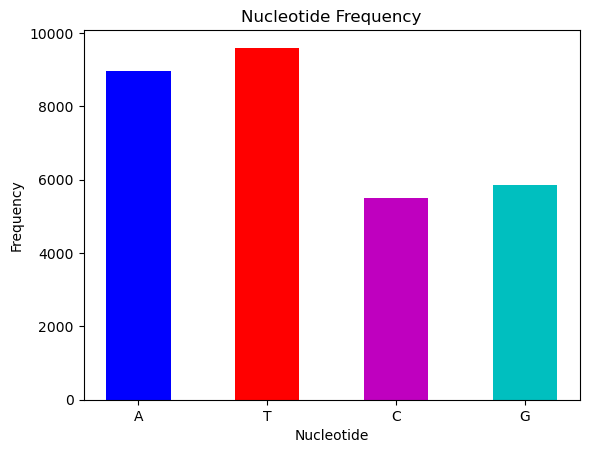

In [11]:
# which one level of frequency is high
import matplotlib.pyplot as plt
width = 0.5
plt.bar(count_nucleotides.keys(), count_nucleotides.values(), width, color=['b', 'r', 'm', 'c'])
plt.xlabel('Nucleotide')
plt.ylabel('Frequency')
plt.title('Nucleotide Frequency')

In [ ]:
First observation: The frequency of the nucleotides A and T is higher than the frequency of C and G.

In [ ]:
Understanding this genetic information is the key to find cures and vaccines. So, the question here is: How do we extract information from this long sequence of letters?

This process is called gene expression: Gene expression is the process by which information from a gene is used in the synthesis of a functional gene product. These products are often proteins

Transcription
Transcription is the first step in gene expression. It involves copying a gene's DNA sequence to make an RNA molecule.

In [12]:
covid_mrna = covid_dna.transcribe()
covid_mrna

Seq('AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGU...AAA')

In [ ]:
Translation
Translation is the process that takes the information passed from DNA as messenger RNA and turns it into a series of amino acids.

In [13]:
covid_aa = covid_mrna.translate()
covid_aa

C:\Users\Apollo Gadget\anaconda3\lib\site-packages\Bio\Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

In [14]:
#amino acids which one is most common
from collections import Counter
common_amino = Counter(covid_aa)
common_amino.most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

Text(0.5, 1.0, 'Protein Sequence Frequency')

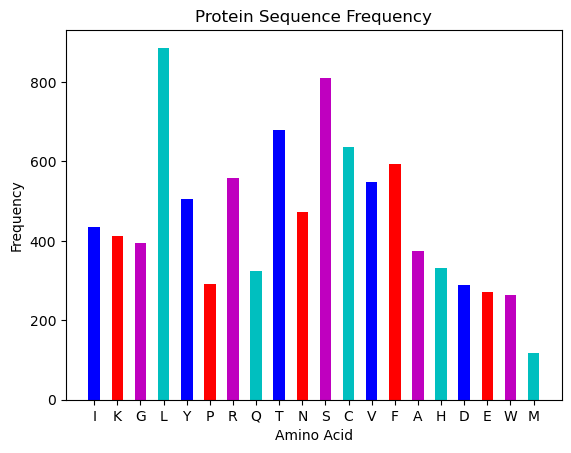

In [15]:
del common_amino['*']

width = 0.5
plt.bar(common_amino.keys(), common_amino.values(), width, color=['b', 'r', 'm', 'c'])
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Protein Sequence Frequency')


In [16]:
print(f"Covid-19's genome has {sum(common_amino.values())} amino acids")

Covid-19's genome has 9193 amino acids


In [ ]:
The split() function splits the sequence at any stop codon and keeps the amino acids chains separated. This makes it easier for further analysis.

In [17]:
proteins = covid_aa.split('*')

In [18]:
#first five aa sequence
proteins[:5]

[Seq('IKGLYLPR'),
 Seq('QTNQLSISCRSVL'),
 Seq('TNFKICVAVTRLHA'),
 Seq('CTHAV'),
 Seq('LITNYCR')]

In [19]:
print(f'We have {len(proteins)} amino acids in the covid-19 genome')

We have 775 amino acids in the covid-19 genome


In [ ]:
It's worth to mention that not all the amino acids sequences are proteins. Only the sequences with more than 20 amino acids code for functional proteins. The short amino acid sequences are oligopeptides and have other functionalities. Here, we will focus on the chains with more than 20 amino acid chains: Proteins.

In [20]:
# length 20 er niche hole we have to remove that
for protein in proteins:
    if len(protein) < 20:
        proteins.remove(protein)

In [21]:
print(f'We have {len(proteins)} proteins with more than 20 amino acids in the covid-19 genome')

We have 409 proteins with more than 20 amino acids in the covid-19 genome


In [22]:
top_5_proteins = sorted(proteins, key = len)

In [23]:
top_5_proteins[-1]

Seq('CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQ...VNN')

In [24]:
#common 5 protein gular length
len(top_5_proteins[-1])

2701

In [ ]:

Save this protein to file for further analysis

In [25]:
with open("protein_seq.fasta", "w") as file:
    file.write(f">covid protein\n{top_5_proteins[-1]}")